In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/XL2248/MSCTD

Cloning into 'MSCTD'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1217 (delta 13), reused 7 (delta 3), pack-reused 1190
Receiving objects: 100% (1217/1217), 102.24 MiB | 18.59 MiB/s, done.
Resolving deltas: 100% (616/616), done.
Updating files: 100% (934/934), done.


In [11]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.2.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 

In [2]:
!pip -q install --upgrade --no-cache-dir gdown

In [10]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 14.4 MB/s eta 0:00:00


In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 17.0 MB/s eta 0:00:00


In [5]:
# !gdown --id 1GAZgPpTUBSfhne-Tp0GDkvSHuq6EMMbj
!cp /content/drive/MyDrive/deep_learning_project/train_ende.zip /content/

In [6]:
# !gdown --id 1B9ZFmSTqfTMaqJ15nQDrRNLqBvo-B39W
!cp /content/drive/MyDrive/deep_learning_project/test.zip /content/

In [7]:
# !gdown --id 12HM8uVNjFg-HRZ15ADue4oLGFAYQwvTA
!cp /content/drive/MyDrive/deep_learning_project/dev.zip /content/

In [8]:
!mkdir /content/dataset
!mkdir /content/dataset/base

In [9]:
!unzip /content/train_ende.zip -d /content/dataset/base
!unzip /content/test.zip -d /content/dataset/base
!unzip /content/dev.zip -d /content/dataset/base

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/base/dev/1054.jpg  
  inflating: /content/dataset/base/dev/1055.jpg  
  inflating: /content/dataset/base/dev/1056.jpg  
  inflating: /content/dataset/base/dev/1057.jpg  
  inflating: /content/dataset/base/dev/1058.jpg  
  inflating: /content/dataset/base/dev/1059.jpg  
  inflating: /content/dataset/base/dev/106.jpg  
  inflating: /content/dataset/base/dev/1060.jpg  
  inflating: /content/dataset/base/dev/1061.jpg  
  inflating: /content/dataset/base/dev/1062.jpg  
  inflating: /content/dataset/base/dev/1063.jpg  
  inflating: /content/dataset/base/dev/1064.jpg  
  inflating: /content/dataset/base/dev/1065.jpg  
  inflating: /content/dataset/base/dev/1066.jpg  
  inflating: /content/dataset/base/dev/1067.jpg  
  inflating: /content/dataset/base/dev/1068.jpg  
  inflating: /content/dataset/base/dev/1069.jpg  
  inflating: /content/dataset/base/dev/107.jpg  
  inflating: /content/dataset/base/dev/1070.jpg  
 

In [87]:
from torch.utils.data import Dataset
from torchvision.io import read_image
import os
import glob
import joblib
import spacy
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import cv2
import ast
from tqdm import tqdm
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
from torchvision import transforms
import torchvision.transforms as T
import transformers
from transformers import BertModel, BertTokenizer, TFBertForSequenceClassification,BertConfig, AdamW, get_linear_schedule_with_warmup
from PIL import Image
import collections
import random
from itertools import groupby
from scipy import stats
from collections import Counter
from tqdm import tqdm
import contractions
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import ComplementNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score
import tensorflow as tf
from transformers import AutoTokenizer, TFBertModel
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.layers import Input, Dense, Dropout, Softmax
from keras.models import Model, load_model

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [25]:
class MSCTDDataset(Dataset):
    def __init__(self,type_dataset, ende_dir, dataset_path, transform=T.ToTensor(), target_transform=None):

        self.type_dataset = type_dataset
        self.english_file = open(ende_dir + '/english_' + self.type_dataset + '.txt', 'r', encoding="utf-8")
        self.english_Lines = [line.strip() for line in self.english_file.readlines()]
        

        self.image_index_file = open(ende_dir + '/image_index_' + self.type_dataset + '.txt', 'r', encoding="utf-8")
        self.image_index_Lines = [ast.literal_eval(line.strip()) for line in self.image_index_file.readlines()]

        self.sentiment_file = open(ende_dir + '/sentiment_' + self.type_dataset + '.txt', 'r', encoding="utf-8")
        self.sentiment_Lines = [int(line.strip()) for line in self.sentiment_file.readlines()]

        self.id = [i for i in range(len(self.english_Lines))]

        self.dataset_path = dataset_path
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.english_Lines)

    def __getitem__(self, idx):

        id = self.id[idx]
        text = self.english_Lines[idx]
        
        if self.type_dataset == 'train':
          img_path = os.path.join(self.dataset_path, 'train_ende/' + str(idx) + '.jpg')
        else:
          img_path = os.path.join(self.dataset_path, self.type_dataset + '/' + str(idx) + '.jpg')

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img, (720,338), interpolation = cv2.INTER_AREA)


        sentiment = self.sentiment_Lines[idx]
        one_hot_sentiment = np.zeros(3)
        one_hot_sentiment[sentiment] = 1
        

        value_in_sublist = map(lambda x: id in x, self.image_index_Lines)
        my_idx = list(value_in_sublist).index(True) 
        conversation_id = str(self.image_index_Lines[my_idx])


        if self.transform:
            img_array = self.transform(img_array)
        if self.target_transform:
            label = self.target_transform(label)
        
        sample_dict = {'id':id, 'text': text , 'image':img_array ,'sentiment':sentiment,'sentiment_1':one_hot_sentiment, 'conversation_id':conversation_id}

        return sample_dict

In [26]:
train_data = MSCTDDataset('train', '/content/MSCTD/MSCTD_data/ende', '/content/dataset/base')
dev_data = MSCTDDataset('dev', '/content/MSCTD/MSCTD_data/ende', '/content/dataset/base')
test_data = MSCTDDataset('test', '/content/MSCTD/MSCTD_data/ende', '/content/dataset/base')

In [27]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=False)
dev_dataloader = DataLoader(dev_data, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

In [28]:
# setting the device to cuda if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


# TF-IDF:

In [29]:
text_train=[]
sentiments_train =[]

for batch, sample in enumerate(tqdm(train_dataloader)):
  text_train.extend(sample['text'])

  sentiments_train.extend(sample['sentiment'])

100%|██████████| 317/317 [08:15<00:00,  1.56s/it]


In [30]:
text_valid=[]
sentiments_valid =[]

for batch, sample in enumerate(tqdm(dev_dataloader)):
  text_valid.extend(sample['text'])

  sentiments_valid.extend(sample['sentiment'])

100%|██████████| 80/80 [02:11<00:00,  1.65s/it]


In [31]:
text_test=[]
sentiments_test =[]

for batch, sample in enumerate(tqdm(test_dataloader)):
  text_test.extend(sample['text'])

  sentiments_test.extend(sample['sentiment'])

100%|██████████| 80/80 [01:48<00:00,  1.36s/it]


In [ ]:
mix_text=text_train+text_valid
mix_sentiments=sentiments_train+sentiments_valid

len(mix_text)

25303

In [ ]:

mix_texts = []
for sentence in mix_text:
    expanded_sentence = contractions.fix(sentence)
    mix_texts.append(expanded_sentence)

print(mix_texts)


['Okay. I am confused.', 'You do not care if I go to Paris with Jane,', 'I am sorry. I have to tell you something,', 'I have to go.', 'I am an accessory to murder.', 'I think you have helped enough.', 'Gaby, please. I cannot stand this anymore.', 'Cannot we talk for a minute?', 'To be honest,', 'Wait. What do you mean?', 'He called us down to the station and grilled US one by one.', 'Why did not he call me down there?', 'Good question, given this whole thing is about you.', 'What are you talking about?', 'Bree, he wants revenge. He wants to bring you down,', 'Gaby, please.', 'I will figure out a way to make things better.', 'do not talk.', 'Oh, my God! You brought it.', 'Now before I give it to you..', 'oh, well, that never works.', 'What I was going to say..', 'They are my whole world. I have nothing else.', 'You have nothing else?', 'That is a bad position to make a deal from.', 'Sorry.', 'Hey, you remember that deal I wanted to make with you?', 'But at least he is honest about it.',

In [ ]:
texts_test = []
for sentence in text_test:
    expanded_sentence = contractions.fix(sentence)
    texts_test.append(expanded_sentence)

print(texts_test)


['With this asshole?', 'Two guys walk in, one walks out.', 'I am not happy about it either, okay? At all.', 'But, for now, it is done.', 'You are on admin leave until they make a determination on the battery...', 'Everybody from Chief Soto to the FBI to the whole goddamn world', 'What do you mean?', 'Just something I saw on oil projects in Saudi.', 'Rather than guard every project,', 'Hang on, what?', 'They had built-in accelerometers', 'When it got in range of a cell tower, it would start phoning home.', 'This looks a lot like the same thing.', 'Did the Hunters put a cell-based tracker', 'Uh... . I do not know. The wife might have done.', 'Hey. listen, can you check with a cell phone company,', 'Yeah, all right, call me back.', 'Are they going to run it down?', 'Hopefully. I am not allowed near it for now.', 'But, Christ, Jenny, that is amazing.', 'Have you named him yet?', 'Well, if he had a name, he would be mine.', 'What is it?', 'Hey. Hey, wake up.', 'Wake up.', 'Shit.', 'The last

In [ ]:


mix_text = []
for word in mix_texts:
    for character in word:
        if character in string.punctuation:
            word = word.replace(character,"")  
    mix_text.append(word)
 
print(mix_text)

['Okay I am confused', 'You do not care if I go to Paris with Jane', 'I am sorry I have to tell you something', 'I have to go', 'I am an accessory to murder', 'I think you have helped enough', 'Gaby please I cannot stand this anymore', 'Cannot we talk for a minute', 'To be honest', 'Wait What do you mean', 'He called us down to the station and grilled US one by one', 'Why did not he call me down there', 'Good question given this whole thing is about you', 'What are you talking about', 'Bree he wants revenge He wants to bring you down', 'Gaby please', 'I will figure out a way to make things better', 'do not talk', 'Oh my God You brought it', 'Now before I give it to you', 'oh well that never works', 'What I was going to say', 'They are my whole world I have nothing else', 'You have nothing else', 'That is a bad position to make a deal from', 'Sorry', 'Hey you remember that deal I wanted to make with you', 'But at least he is honest about it', 'No I wound up taking a different angle on t

In [ ]:

text_test = []
for word in texts_test:
    for character in word:
        if character in string.punctuation:
            word = word.replace(character,"")  
    text_test.append(word)
 
print(text_test)

['With this asshole', 'Two guys walk in one walks out', 'I am not happy about it either okay At all', 'But for now it is done', 'You are on admin leave until they make a determination on the battery', 'Everybody from Chief Soto to the FBI to the whole goddamn world', 'What do you mean', 'Just something I saw on oil projects in Saudi', 'Rather than guard every project', 'Hang on what', 'They had builtin accelerometers', 'When it got in range of a cell tower it would start phoning home', 'This looks a lot like the same thing', 'Did the Hunters put a cellbased tracker', 'Uh  I do not know The wife might have done', 'Hey listen can you check with a cell phone company', 'Yeah all right call me back', 'Are they going to run it down', 'Hopefully I am not allowed near it for now', 'But Christ Jenny that is amazing', 'Have you named him yet', 'Well if he had a name he would be mine', 'What is it', 'Hey Hey wake up', 'Wake up', 'Shit', 'The last few hits have been near Calumet', 'It must be far 

In [ ]:
train_text=mix_text[0:20240]
valid_text=mix_text[20240:]
print(valid_text)

['He diagnosed Andy with growing pains', 'But you know I grew up', 'Your pain is dramatic to me', 'Andy your moms right', 'It is a good thing that you came', 'Okay thanks because it does hurt', 'Everything hurts all the time', 'Okay Well I am going to give you a quick exam', 'I know I will be all right', 'This does not feel real', 'Does this feel real to you', 'No I do not know', 'Oh crap', 'Does your friend have any allergies', 'Is she on any medication', 'She is not our friend', 'Jasmine we barely know her', 'We met her on the plane from sydney', 'We are backpacking seeing the states', 'So we hardly know her', 'We are just traveling mates', 'She is really nice though', 'All right let us move', 'A name uh can you give me that', 'She is going to wake up in a lot of pain', 'I am heading back to surgery', 'Patient is george omalley 29', 'Procedure is organ recovery for donation', 'I will call on the receiving surgeons', 'Kidneys', 'St lukes childrens boise', 'Who is it for', 'Sorry', 'wh

In [ ]:

# Text preprocessing and vectorization
vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(train_text)
tfidf_valid= vectorizer.transform(valid_text)
tfidf_test = vectorizer.transform(text_test)

In [ ]:
joblib.dump(vectorizer,'vectorizer_1_1.pkl')
!cp /content/vectorizer_1_1.pkl /content/drive/MyDrive/deep_learning_project/phase2/

In [ ]:
# Convert to PyTorch tensors
tfidf_train = torch.from_numpy(tfidf_train.toarray()).float()
labels_train = torch.from_numpy(np.array(sentiments_train)).long()

In [ ]:
tfidf_train.shape

torch.Size([20240, 10230])

In [ ]:
tfidf_valid = torch.from_numpy(tfidf_valid.toarray()).float()
labels_valid = torch.from_numpy(np.array(sentiments_valid)).long()

In [ ]:
tfidf_test = torch.from_numpy(tfidf_test.toarray()).float()
labels_test = torch.from_numpy(np.array(sentiments_test)).long()

In [ ]:


train_dataset_= TensorDataset(torch.tensor(tfidf_train), torch.tensor(labels_train))
train_dataloader_ = DataLoader(train_dataset_, batch_size=64, shuffle=True)

valid_dataset_= TensorDataset(torch.tensor(tfidf_valid), torch.tensor(labels_valid))
valid_dataloader_ = DataLoader(valid_dataset_, batch_size=64, shuffle=False)

test_dataset_ = TensorDataset(torch.tensor(tfidf_test ), torch.tensor(labels_test))
test_dataloader_ = DataLoader(test_dataset_, batch_size=64, shuffle=False)


<ipython-input-106-1aacf9d19dfe>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset_= TensorDataset(torch.tensor(tfidf_train), torch.tensor(labels_train))
<ipython-input-106-1aacf9d19dfe>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  valid_dataset_= TensorDataset(torch.tensor(tfidf_valid), torch.tensor(labels_valid))
<ipython-input-106-1aacf9d19dfe>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset_ = TensorDataset(torch.tensor(tfidf_test ), torch.tensor(labels_test))


In [ ]:

# Define the neural network
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def valid_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
# Initialize the model
input_dim =tfidf_train.shape[1]
hidden_dim = 1000
output_dim = 3
model_ph2_1_1 = SentimentClassifier(input_dim, hidden_dim, output_dim)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ph2_1_1.parameters(), lr=0.0001)

epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader_, model_ph2_1_1, loss_fn, optimizer)
    valid_loop(valid_dataloader_, model_ph2_1_1, loss_fn)
    test_loop(test_dataloader_, model_ph2_1_1, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.100133  [    0/20240]
loss: 1.092340  [ 6400/20240]
loss: 1.082592  [12800/20240]
loss: 1.042446  [19200/20240]
val Error: 
 Accuracy: 37.4%, Avg loss: 1.074931 

Test Error: 
 Accuracy: 43.4%, Avg loss: 1.068996 

Epoch 2
-------------------------------
loss: 1.095591  [    0/20240]
loss: 1.017376  [ 6400/20240]
loss: 1.029287  [12800/20240]
loss: 1.051545  [19200/20240]
val Error: 
 Accuracy: 48.6%, Avg loss: 1.028620 

Test Error: 
 Accuracy: 50.1%, Avg loss: 1.020784 

Epoch 3
-------------------------------
loss: 0.933520  [    0/20240]
loss: 0.922921  [ 6400/20240]
loss: 0.976028  [12800/20240]
loss: 0.920310  [19200/20240]
val Error: 
 Accuracy: 51.9%, Avg loss: 0.991338 

Test Error: 
 Accuracy: 52.5%, Avg loss: 0.983668 

Done!


In [ ]:
torch.save(model_ph2_1_1,'model_ph2_1_1.pth')
!cp /content/model_ph2_1_1.pth /content/drive/MyDrive/deep_learning_project/phase2/

In [ ]:

predictions = model_ph2_1_1(tfidf_test)
predictions = predictions.argmax(1)
confusion_matrix = confusion_matrix(labels_test, predictions)
f1_score = f1_score(labels_test, predictions, average='macro')
print(f1_score)

0.5091793790614124


# Word2Vec:

In [ ]:
train_val_text=text_train+text_valid
train_val_sent=sentiments_train+sentiments_valid

len(train_val_text)

25303

In [ ]:
train_val_contraction = []
for sentence in train_val_text:
    expanded_sentence = contractions.fix(sentence)
    train_val_contraction.append(expanded_sentence)

In [ ]:
test_contraction = []
for sentence in text_test:
    expanded_sentence = contractions.fix(sentence)
    test_contraction.append(expanded_sentence)

In [ ]:
train_val_clean = []
for word in train_val_contraction:
    for character in word:
        if character in string.punctuation:
            word = word.replace(character,"")  
    train_val_clean.append(word)

In [ ]:
test_clean = []
for word in test_contraction:
    for character in word:
        if character in string.punctuation:
            word = word.replace(character,"")  
    test_clean.append(word)

In [ ]:

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("clf", ComplementNB()),
    ]
)
pipeline

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', ComplementNB())])

In [ ]:
parameter_grid = {
    "vect__max_df": (0.5, 0.6, 0.8, 1.0),
    "vect__min_df": (0.01, 1, 3, 5, 10),
    "vect__stop_words": ('english', None),  
    "vect__max_features": (1000,2000,5000,10000,None ),
    "clf__alpha": np.logspace(-6, 6, 13),
}

In [ ]:

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameter_grid,
    n_iter=40,
    random_state=0,
    cv=3,
    n_jobs=-1,
    verbose=4,
)

print("Performing grid search...")
print("Hyperparameters to be evaluated:")
pprint(parameter_grid)

Performing grid search...
Hyperparameters to be evaluated:
{'clf__alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
 'vect__max_df': (0.5, 0.6, 0.8, 1.0),
 'vect__max_features': (1000, 2000, 5000, 10000, None),
 'vect__min_df': (0.01, 1, 3, 5, 10),
 'vect__stop_words': ('english', None)}


In [ ]:
random_search.fit(train_val_clean, train_val_sent)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                             ('clf', ComplementNB())]),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'clf__alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
                                        'vect__max_df': (0.5, 0.6, 0.8, 1.0),
                                        'vect__max_features': (1000, 2000, 5000,
                                                               10000, None),
                                        'vect__min_df': (0.01, 1, 3, 5, 10),
                                        'vect__stop_words': ('english', None)},
                   random_state=0, verbose=3)

In [ ]:
print("Best parameters combination found:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameter_grid.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Best parameters combination found:
clf__alpha: 1.0
vect__max_df: 0.6
vect__max_features: 2000
vect__min_df: 1
vect__stop_words: None


In [ ]:
test_accuracy = random_search.score(test_clean, sentiments_test)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Accuracy of the best parameters using the inner CV of the random search: 0.511
Accuracy on test set: 0.520


I'm going to use these parameters

In [ ]:
# Convert text data to tf-idf vectors
vectorizer = TfidfVectorizer(max_df=0.6,min_df=1,max_features=2000)
train_val_tfidf = vectorizer.fit_transform(train_val_clean)
test_tfidf = vectorizer.transform(test_clean)

In [ ]:
joblib.dump(vectorizer,'vectorizer.pkl')
!cp /content/vectorizer.pkl /content/drive/MyDrive/deep_learning_project/phase2/

In [ ]:
num_sentences , num_features = train_val_tfidf.shape[0],train_val_tfidf.shape[1]
print(f'Number of sentences: {num_sentences} , Number of features: {num_features}')

Number of sentences: 25303 , Number of features: 2000


In [ ]:
word_dict = np.zeros((num_features,num_sentences+1),dtype='float32')

In [ ]:
train_val_vector = np.zeros((num_sentences,num_sentences+1),dtype='float32')
test_vector = np.zeros((test_tfidf.shape[0],num_sentences+1),dtype='float32')

In [ ]:
j = 0
for i in range(num_sentences):
  if len(train_val_tfidf[i,:].nonzero()[1]) == 0:
    #print(f'sentence {i}')
    j +=1
print(f'{j} sentences with no words in {num_features} unique words chosen by TfidfVectorizer')

336 sentences with no words in 2000 unique words chosen by TfidfVectorizer


In [ ]:
for i in range(num_sentences): #run this loop for every sentence
  n_nonzero = len(train_val_tfidf[i,:].nonzero()[1])
  if n_nonzero != 0:
    y = np.array([1 for k in range(n_nonzero)]+[-1 for k in range(n_nonzero)]) #labels for svm
    j = int(0)
    l = []
    a = []
    a.extend(train_val_tfidf[:,train_val_tfidf[i].nonzero()[1]].toarray()) #add vectors of sentence i words
    a = np.asarray(a)#shape (1,num_sentences,non_zero)
    if n_nonzero != 1 :
      a = a.squeeze() #shape (num_sentences,non_zero)
    a = a.T #shape (non_zero,num_sentences)
    while j != len(train_val_tfidf[i].indices): #there are words in the sentence and we haven't chosen enough random zero elements
      idx = np.random.choice(num_features,replace=False) #don't generate the same number twice
      if idx not in train_val_tfidf[i].indices: #choose from words that are not in sentence i
        l.append(train_val_tfidf[:,idx].toarray())
        j +=1

        
    l = np.asarray(l) #shape (non_zero,num_sentences,1)
    l = l.squeeze(axis=-1) #shape (non_zero,num_sentences)
    f = np.concatenate((a,l),axis=0)#X_train for svm

    #SVM
    clf = SVC(kernel='linear').fit(f,y)
    v = np.concatenate([clf.coef_.squeeze(),clf.intercept_])
    for col_idx in train_val_tfidf[i].nonzero()[1]:
      word_dict[col_idx] += v.astype('float32')





In [ ]:
for i in range(num_features): #use mean of different vactors for word i as its final representation
  if len(train_val_tfidf[:,i].nonzero()[0]) != 0:
    word_dict[i] /= len(train_val_tfidf[:,i].nonzero()[0])

In [ ]:
for i in range(num_sentences):#use mean of all words in sentence i as its vector for classification
  for j in train_val_tfidf[i].nonzero()[1] :
    train_val_vector[i] += word_dict[j]
  if len(train_val_tfidf[i].nonzero()[1]) != 0:
    train_val_vector[i] /= len(train_val_tfidf[i].nonzero()[1])



In [ ]:
for i in range(test_tfidf.shape[0]):#use mean of all words in sentence i as its vector for classification
  for j in test_tfidf[i].nonzero()[1] :
    test_vector[i] += word_dict[j]
  if len(test_tfidf[i].nonzero()[1]) != 0:
    test_vector[i] /= len(test_tfidf[i].nonzero()[1])

In [ ]:
np.save('train_val_vector.npy',train_val_vector)
np.save('test_vector.npy',test_vector)
np.save('word_dict.npy',word_dict)

In [ ]:
!cp  /content/train_val_vector.npy /content/drive/MyDrive/deep_learning_project/phase2/
!cp  /content/test_vector.npy /content/drive/MyDrive/deep_learning_project/phase2/
!cp  /content/word_dict.npy /content/drive/MyDrive/deep_learning_project/phase2/

In [ ]:

lsa = make_pipeline(TruncatedSVD(n_components=5000), Normalizer(copy=False))
train_val_lsa = lsa.fit_transform(train_val_vector)
explained_variance = lsa[0].explained_variance_ratio_.sum() #see how much information reduced size vectors contain

print(train_val_lsa.shape)
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

(25303, 5000)
Explained variance of the SVD step: 100.0%


In [ ]:
for n in [500,1000,2000,3000,4000] :
  lsa = make_pipeline(TruncatedSVD(n_components=n), Normalizer(copy=True))
  train_val_lsa = lsa.fit_transform(train_val_vector)
  explained_variance = lsa[0].explained_variance_ratio_.sum() #see how much information reduced size vectors contain

  print(f"Number of components: {n}")
  print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")
  if explained_variance >= 0.95:
    break
print(f"best n : {n}")
print(train_val_lsa.shape)

Number of components: 500
Explained variance of the SVD step: 74.3%
Number of components: 1000
Explained variance of the SVD step: 91.3%
Number of components: 2000
Explained variance of the SVD step: 100.0%
best n : 2000
(25303, 2000)


In [ ]:
test_lsa = lsa.transform(test_vector)

In [ ]:
joblib.dump(lsa, 'lsa.pkl')

['lsa.pkl']

In [ ]:
!cp /content/lsa.pkl /content/drive/MyDrive/deep_learning_project/phase2/

In [ ]:
train_lsa = torch.from_numpy(train_val_lsa[:len(sentiments_train),:])
train_y = torch.from_numpy(np.array(sentiments_train)).long()

train_dataset = TensorDataset(train_lsa, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

valid_lsa = torch.from_numpy(train_val_lsa[len(sentiments_train):,:])
valid_y = torch.from_numpy(np.array(sentiments_valid)).long()

valid_dataset = TensorDataset(valid_lsa, valid_y)
valid_dataloader = DataLoader(valid_dataset, batch_size=64, shuffle=False)

test_lsa = torch.from_numpy(test_lsa)
test_y = torch.from_numpy(np.array(sentiments_test)).long()

test_dataset = TensorDataset(test_lsa, test_y)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Initialize the model
input_dim =train_lsa.shape[1]
hidden_dim = 1000
output_dim = 3
model_ph2_1_2 = SentimentClassifier(input_dim, hidden_dim, output_dim)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ph2_1_2.parameters(), lr=0.0001)

In [ ]:

epochs = 9
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model_ph2_1_2, loss_fn, optimizer)
    valid_loop(valid_dataloader, model_ph2_1_2, loss_fn)
    test_loop(test_dataloader, model_ph2_1_2, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.098826  [    0/20240]
loss: 1.107455  [ 6400/20240]
loss: 1.081164  [12800/20240]
loss: 1.060485  [19200/20240]
val Error: 
 Accuracy: 36.7%, Avg loss: 1.091282 

Test Error: 
 Accuracy: 42.8%, Avg loss: 1.090225 

Epoch 2
-------------------------------
loss: 1.066757  [    0/20240]
loss: 1.064357  [ 6400/20240]
loss: 1.074578  [12800/20240]
loss: 1.085762  [19200/20240]
val Error: 
 Accuracy: 38.1%, Avg loss: 1.085457 

Test Error: 
 Accuracy: 44.0%, Avg loss: 1.085314 

Epoch 3
-------------------------------
loss: 1.091668  [    0/20240]
loss: 1.052557  [ 6400/20240]
loss: 1.052391  [12800/20240]
loss: 1.043600  [19200/20240]
val Error: 
 Accuracy: 41.0%, Avg loss: 1.073993 

Test Error: 
 Accuracy: 45.7%, Avg loss: 1.071201 

Epoch 4
-------------------------------
loss: 1.042236  [    0/20240]
loss: 1.085290  [ 6400/20240]
loss: 1.081713  [12800/20240]
loss: 1.035084  [19200/20240]
val Error: 
 Accuracy: 44.0%, Avg loss: 1.057897 



In [ ]:
torch.save(model_ph2_1_2,'model_ph2_1_2.pth')
!cp /content/model_ph2_1_2.pth /content/drive/MyDrive/deep_learning_project/phase2/

******************************************************

# GloVe:

In [ ]:
text_train=[]
sentiments_train =[]

for batch, sample in enumerate(tqdm(train_dataloader)):
  text_train.extend(sample['text'])

  sentiments_train.extend(sample['sentiment'])


100%|██████████| 317/317 [08:13<00:00,  1.56s/it]


In [ ]:
text_valid=[]
sentiments_valid =[]

for batch, sample in enumerate(tqdm(dev_dataloader)):
  text_valid.extend(sample['text'])

  sentiments_valid.extend(sample['sentiment'])
print(len(text_valid))
len(sentiments_valid)

100%|██████████| 80/80 [01:46<00:00,  1.33s/it]

5063


5063

In [ ]:
text_test=[]
sentiments_test =[]

for batch, sample in enumerate(tqdm(test_dataloader)):
  text_test.extend(sample['text'])

  sentiments_test.extend(sample['sentiment'])
print(len(text_test))
len(sentiments_test)

100%|██████████| 80/80 [01:54<00:00,  1.43s/it]

5067


5067

In [ ]:
text=text_train+text_valid+text_test
sentiments=sentiments_train+sentiments_valid+sentiments_test
text[25303]

'With this asshole?'

In [ ]:
!gdown --id 1AO1Eob8YrVFc0FEmje5hXezIKzZGqJIU
# load the GloVe embeddings into a dictionary
glove = {}
with open("glove.6B.50d.txt", "r") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove[word] = vector

def get_word_vector(word):
    if word in glove:
        return glove[word]
    else:
        return np.zeros(50)


/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AO1Eob8YrVFc0FEmje5hXezIKzZGqJIU
To: /content/glove.6B.50d.txt
100% 171M/171M [00:00<00:00, 227MB/s]


In [ ]:


# load the spacy model
nlp = spacy.load("en_core_web_sm")

# create a list to hold the numerical representations of the text
text_vectors = []

# loop over each sentence in the text list
for sentence in text:
    # tokenize the sentence
    doc = nlp(sentence)
    
    # create a list to hold the word embeddings for the sentence
    sentence_vectors = []
    
    # loop over each token in the sentence
    for token in doc:
        # get the GloVe word embedding for the token
        word_vector = get_word_vector(token.text)
        
        # add the word embedding to the list
        sentence_vectors.append(word_vector)
    
    # average the word embeddings to get the sentence embedding
    sentence_vector = np.mean(sentence_vectors, axis=0)
    
    # add the sentence embedding to the list
    text_vectors.append(sentence_vector)

# convert the list of sentence embeddings to a numpy array
text_vectors = np.array(text_vectors)

# convert the text vectors and sentiments to PyTorch tensors
text_tensor = torch.from_numpy(text_vectors).to(torch.float32)
sentiments_tensor = torch.from_numpy(np.array(sentiments))


In [ ]:
text_tensor[0].dtype

torch.float32

In [ ]:

num_train_samples = 20240
train_dataset = TensorDataset(text_tensor[:num_train_samples], sentiments_tensor[:num_train_samples])
valid_dataset = TensorDataset(text_tensor[num_train_samples:25303], sentiments_tensor[num_train_samples:25303])
test_dataset = TensorDataset(text_tensor[25303:], sentiments_tensor[25303:])




# create data loaders from the train and validation datasets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)



In [ ]:
# initialize the model
input_dim = 50 # size of GloVe word embeddings
hidden_dim = 20
output_dim = len(np.unique(sentiments)) # number of unique sentiment labels
model_ph2_2_1 = SentimentClassifier(input_dim, hidden_dim, output_dim)
batch_size=32
# specify the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ph2_2_1.parameters(), lr=0.001)

In [ ]:

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model_ph2_2_1, loss_fn, optimizer)
    valid_loop(valid_loader, model_ph2_2_1, loss_fn)
    test_loop(test_loader, model_ph2_2_1, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.127604  [    0/20240]
loss: 1.046462  [ 3200/20240]
loss: 1.043369  [ 6400/20240]
loss: 1.070426  [ 9600/20240]
loss: 1.067234  [12800/20240]
loss: 1.084938  [16000/20240]
loss: 1.044543  [19200/20240]
val Error: 
 Accuracy: 42.1%, Avg loss: 1.062844 

Test Error: 
 Accuracy: 45.0%, Avg loss: 1.053393 

Epoch 2
-------------------------------
loss: 0.956015  [    0/20240]
loss: 1.029133  [ 3200/20240]
loss: 0.958760  [ 6400/20240]
loss: 1.019039  [ 9600/20240]
loss: 1.046376  [12800/20240]
loss: 1.120046  [16000/20240]
loss: 1.036594  [19200/20240]
val Error: 
 Accuracy: 44.9%, Avg loss: 1.046927 

Test Error: 
 Accuracy: 44.4%, Avg loss: 1.060243 

Epoch 3
-------------------------------
loss: 1.009272  [    0/20240]
loss: 1.028143  [ 3200/20240]
loss: 0.930567  [ 6400/20240]
loss: 1.019787  [ 9600/20240]
loss: 1.016987  [12800/20240]
loss: 0.970328  [16000/20240]
loss: 1.109305  [19200/20240]
val Error: 
 Accuracy: 47.4%, Avg loss: 1.03

In [ ]:
torch.save(model_ph2_2_1, 'model_ph2_2_1.pth')
!cp /content/model_ph2_2_1.pth /content/drive/MyDrive/deep_learning_project/phase2/

**ATTENTION: RUNTIME CHANGED FROM CPU to GPU. THIS HAPPENS ONLY FOR BERT SECTION**

# BERT:

In [13]:
# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
train_data = MSCTDDataset('train', '/content/MSCTD/MSCTD_data/ende', '/content/dataset/base')
dev_data = MSCTDDataset('dev', '/content/MSCTD/MSCTD_data/ende', '/content/dataset/base')
test_data = MSCTDDataset('test', '/content/MSCTD/MSCTD_data/ende', '/content/dataset/base')

In [ ]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=False)
dev_dataloader = DataLoader(dev_data, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
text_train=[]
sentiments_train =[]

for batch, sample in enumerate(tqdm(train_dataloader)):
  text_train.extend(sample['text'])

  sentiments_train.extend(sample['sentiment'].numpy().tolist())

100%|██████████| 317/317 [08:15<00:00,  1.56s/it]


In [71]:
text_valid=[]
sentiments_valid =[]

for batch, sample in enumerate(tqdm(dev_dataloader)):
  text_valid.extend(sample['text'])

  sentiments_valid.extend(sample['sentiment'].numpy().tolist())

100%|██████████| 80/80 [01:53<00:00,  1.42s/it]


In [72]:
text_test=[]
sentiments_test =[]

for batch, sample in enumerate(tqdm(test_dataloader)):
  text_test.extend(sample['text'])

  sentiments_test.extend(sample['sentiment'].numpy().tolist())

100%|██████████| 80/80 [01:53<00:00,  1.41s/it]


In [35]:
# Set the model name
MODEL_NAME = 'bert-base-uncased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME, do_lower_case=True)

In [73]:
content = text_train + text_valid + text_test
token_lens = []
for txt in content:
    tokens = tokenizer.encode(txt, max_length=50, truncation=True)
    token_lens.append(len(tokens))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


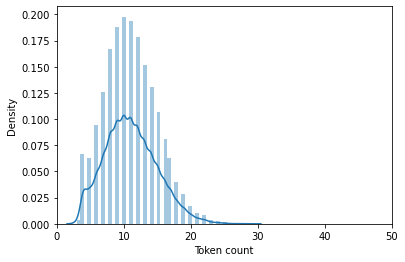

In [75]:
import seaborn as sns
sns.distplot(token_lens)
plt.xlim([0, 50]);
plt.xlabel('Token count')
plt.show()

looking at the plot, we chose 40 for max_length

In [70]:
train_list = [text_train,sentiments_train]

df_train = pd.DataFrame(train_list).transpose()
df_train.columns = ['sentence', 'label']
df_train.head()

,sentence,label
0,Okay. I'm confused.,0
1,"You don't care if I go to Paris with Jane,",0
2,"I'm sorry. I have to tell you something,",1
3,I have to go.,1
4,I'm an accessory to murder.,1


In [76]:
valid_list = [text_valid,sentiments_valid]

df_valid = pd.DataFrame(valid_list).transpose()
df_valid.columns = ['sentence', 'label']
df_valid.head()

,sentence,label
0,He diagnosed Andy with growing pains.,0
1,"But, you know, I grew up,",0
2,Your pain is dramatic to me.,1
3,Andy. your mom's right.,0
4,It's a good thing that you came.,0


In [77]:
test_list = [text_test,sentiments_test]

df_test = pd.DataFrame(test_list).transpose()
df_test.columns = ['sentence', 'label']
df_test.head()

,sentence,label
0,With this asshole?,1
1,"Two guys walk in, one walks out.",1
2,"I'm not happy about it either, okay? At all.",1
3,"But, for now, it's done.",1
4,You're on admin leave until they make a determ...,0


In [78]:
y_train = to_categorical(df_train.label)
y_valid = to_categorical(df_valid.label)
y_test = to_categorical(df_test.label)


In [79]:
MAX_LEN = 40

x_train = tokenizer(
          text= df_train.sentence.tolist(),
          add_special_tokens=True,
          max_length=MAX_LEN,
          truncation=True,
          padding='max_length', 
          return_tensors='tf',
          return_token_type_ids = False,
          return_attention_mask = True,
          )
x_valid = tokenizer(
          text= df_valid.sentence.tolist(),
          add_special_tokens=True,
          max_length=MAX_LEN,
          truncation=True,
          padding='max_length', 
          return_tensors='tf',
          return_token_type_ids = False,
          return_attention_mask = True,
          )
x_test = tokenizer(
          text= df_test.sentence.tolist(),
          add_special_tokens=True,
          max_length=MAX_LEN,
          truncation=True,
          padding='max_length', 
          return_tensors='tf',
          return_token_type_ids = False,
          return_attention_mask = True,
          )

In [82]:
bert = TFBertModel.from_pretrained(MODEL_NAME)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [59]:
def build_model(bert, max_len, is_trainable, optimizer):
    input_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

    
    outputs = bert(input_ids,attention_mask = input_mask)
    net = outputs['pooler_output']
    
    net = Dropout(0.1)(net)
    net = Dense(3, activation=None)(net)
    
    model = Model(inputs=[input_ids, input_mask], outputs=net)
    model.layers[2].trainable = is_trainable


    model.compile(optimizer=optimizer, loss =CategoricalCrossentropy(from_logits = True),metrics = CategoricalAccuracy('balanced_accuracy'))
    
    return model

In [83]:
model = build_model(bert, MAX_LEN,True,Adam(learning_rate=5e-05,epsilon=1e-08))

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 40)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 40)]         0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 40,                                          

In [84]:
history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = ({'input_ids':x_valid['input_ids'],'attention_mask':x_valid['attention_mask']}, y_valid),
    epochs=1,
    batch_size=32
)

633/633 [==============================] - 205s 293ms/step - loss: 0.8758 - balanced_accuracy: 0.6071 - val_loss: 0.8463 - val_balanced_accuracy: 0.6091


In [85]:
loss, accuracy =  model.evaluate({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']},y_test, verbose=1)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

159/159 [==============================] - 15s 96ms/step - loss: 0.8605 - balanced_accuracy: 0.6244
Test loss: 0.8604512214660645
Test accuracy: 0.6244326233863831


In [ ]:
model.save("model_ph2_2_2.h5")

In [89]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [90]:
!cp /content/model_ph2_2_2.h5 /content/drive/MyDrive/deep_learning_project/phase2/

# Evaluation:

In [ ]:
# setting the device to cuda if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
text_test=[]
sentiments_test =[]

for batch, sample in enumerate(tqdm(test_dataloader)):
  text_test.extend(sample['text'])

  sentiments_test.extend(sample['sentiment'])

100%|██████████| 80/80 [01:46<00:00,  1.33s/it]


In [ ]:
test_contraction = []
for sentence in text_test:
    expanded_sentence = contractions.fix(sentence)
    test_contraction.append(expanded_sentence)


test_clean = []
for word in test_contraction:
    for character in word:
        if character in string.punctuation:
            word = word.replace(character,"")  
    test_clean.append(word)
 


In [ ]:

# Define the neural network
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


## TF-IDF:

In [ ]:
!gdown --id 1-EDvR1Tf28HM0T3QPqBKlgxtqWkAX-Vf

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-EDvR1Tf28HM0T3QPqBKlgxtqWkAX-Vf
To: /content/vectorizer_1_1.pkl
100% 292k/292k [00:00<00:00, 97.7MB/s]


In [ ]:
# Text preprocessing and vectorization
vectorizer = joblib.load('vectorizer_1_1.pkl')
tfidf_test = vectorizer.transform(test_clean)


In [ ]:
# Initialize the model
input_dim =10230 #tfidf_train.shape[1]
hidden_dim = 1000
output_dim = 3
model_ph2_1_1 = SentimentClassifier(input_dim, hidden_dim, output_dim)

In [ ]:
!gdown --id 1-DT7AseZfSzuLatAihVVA2y9AfEFSPXa
model_ph2_1_1 = torch.load('model_ph2_1_1.pth',map_location=torch.device(device))
model_ph2_1_1.eval()

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-DT7AseZfSzuLatAihVVA2y9AfEFSPXa
To: /content/model_ph2_1_1.pth
100% 40.9M/40.9M [00:00<00:00, 153MB/s]


SentimentClassifier(
  (fc1): Linear(in_features=10230, out_features=1000, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1000, out_features=3, bias=True)
)

In [ ]:
tfidf_test = torch.from_numpy(tfidf_test.toarray()).float()

In [ ]:
tfidf_test.dtype

torch.float32

In [ ]:
pred = model_ph2_1_1(tfidf_test)
y_pred = torch.argmax(pred, dim=1)
f1 = f1_score(sentiments_test, y_pred.numpy().tolist(), average='weighted')
acc = accuracy_score(sentiments_test,y_pred)
print(f'accuracy_score using TF-IDF model is {acc}')
print(f'f1_score score using TF-IDF model is {f1}')


accuracy_score using TF-IDF model is 0.5200315768699427
f1_score score using TF-IDF model is 0.5157584315125393


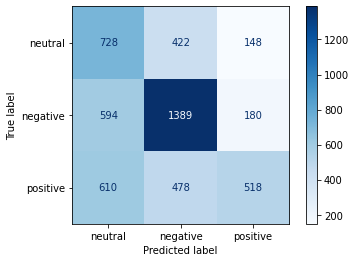

In [ ]:
cm = confusion_matrix(sentiments_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neutral','negative','positive'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

## Word2Vec:

In [ ]:
!gdown --id 1-CyXpm4CnnZt8e5SjD0Vvb9OiMua5TKm

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-CyXpm4CnnZt8e5SjD0Vvb9OiMua5TKm
To: /content/vectorizer.pkl
100% 194k/194k [00:00<00:00, 99.8MB/s]


In [ ]:
vectorizer = joblib.load('vectorizer.pkl')
test_tfidf = vectorizer.transform(test_clean)

In [ ]:
!gdown --id 1-6Nv15_zMgkKJ7r7Au1AAhtnRLGl1xpb
word_dict = np.load('word_dict.npy')

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-6Nv15_zMgkKJ7r7Au1AAhtnRLGl1xpb
To: /content/word_dict.npy
100% 202M/202M [00:01<00:00, 169MB/s]


In [ ]:
num_sentences = 25303
test_vector = np.zeros((test_tfidf.shape[0],num_sentences+1),dtype='float32')

In [ ]:
for i in range(test_tfidf.shape[0]):#use mean of all words in sentence i as its vector for classification
  for j in test_tfidf[i].nonzero()[1] :
    test_vector[i] += word_dict[j]
  if len(test_tfidf[i].nonzero()[1]) != 0:
    test_vector[i] /= len(test_tfidf[i].nonzero()[1])

In [ ]:
!gdown --id 1-AzC046EoQzNaDnPoAbMDmyBmUvdef0j

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-AzC046EoQzNaDnPoAbMDmyBmUvdef0j
To: /content/lsa.pkl
100% 202M/202M [00:01<00:00, 163MB/s]


In [ ]:
lsa = joblib.load('lsa.pkl')

In [ ]:
test_lsa = lsa.transform(test_vector)

In [ ]:
# Initialize the model
input_dim = 2000 #train_lsa.shape[1]
hidden_dim = 1000
output_dim = 3
model_ph2_1_2 = SentimentClassifier(input_dim, hidden_dim, output_dim)

In [ ]:
!gdown --id 1-AMQxkcOBBcQJWXoGXAdYFOurcF_KsyP
model_ph2_1_2 = torch.load('model_ph2_1_2.pth',map_location=torch.device(device))
model_ph2_1_2.eval()

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-AMQxkcOBBcQJWXoGXAdYFOurcF_KsyP
To: /content/model_ph2_1_2.pth
100% 8.02M/8.02M [00:00<00:00, 98.3MB/s]


SentimentClassifier(
  (fc1): Linear(in_features=2000, out_features=1000, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1000, out_features=3, bias=True)
)

In [ ]:
test_lsa = torch.from_numpy(test_lsa)

In [ ]:
pred = model_ph2_1_2(test_lsa)
y_pred = torch.argmax(pred, dim=1)
f1 = f1_score(sentiments_test, y_pred.numpy().tolist(), average='weighted')
acc = accuracy_score(sentiments_test,y_pred)
print(f'accuracy_score using Word2Vec model is {acc}')
print(f'f1_score score using Word2Vec model is {f1}')

accuracy_score using Word2Vec model is 0.5273337280442076
f1_score score using Word2Vec model is 0.5215056747990992


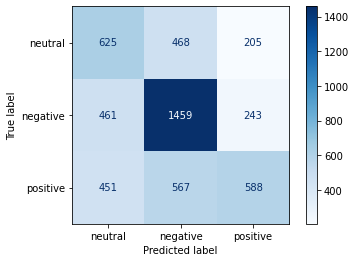

In [ ]:
cm = confusion_matrix(sentiments_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neutral','negative','positive'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

## GloVe:

In [ ]:
!gdown --id 1AO1Eob8YrVFc0FEmje5hXezIKzZGqJIU
# load the GloVe embeddings into a dictionary
glove = {}
with open("glove.6B.50d.txt", "r") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove[word] = vector

def get_word_vector(word):
    if word in glove:
        return glove[word]
    else:
        return np.zeros(50)

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AO1Eob8YrVFc0FEmje5hXezIKzZGqJIU
To: /content/glove.6B.50d.txt
100% 171M/171M [00:03<00:00, 52.7MB/s]


In [ ]:
# load the spacy model
nlp = spacy.load("en_core_web_sm")

# create a list to hold the numerical representations of the text
text_vectors = []

# loop over each sentence in the text list
for sentence in text_test:
    # tokenize the sentence
    doc = nlp(sentence)
    
    # create a list to hold the word embeddings for the sentence
    sentence_vectors = []
    
    # loop over each token in the sentence
    for token in doc:
        # get the GloVe word embedding for the token
        word_vector = get_word_vector(token.text)
        
        # add the word embedding to the list
        sentence_vectors.append(word_vector)
    
    # average the word embeddings to get the sentence embedding
    sentence_vector = np.mean(sentence_vectors, axis=0)
    
    # add the sentence embedding to the list
    text_vectors.append(sentence_vector)

# convert the list of sentence embeddings to a numpy array
text_vectors = np.array(text_vectors)


In [ ]:
# convert the text vectors and sentiments to PyTorch tensors
text_tensor = torch.from_numpy(text_vectors).to(torch.float32)

In [ ]:
# initialize the model
input_dim = 50 # size of GloVe word embeddings
hidden_dim = 20
output_dim = 3 
model_ph2_2_1 = SentimentClassifier(input_dim, hidden_dim, output_dim)

In [ ]:
!gdown --id 16ToxSO9EtYWUiK41qfE1iCoZEvPUQxml
model_ph2_2_1 = torch.load('model_ph2_2_1.pth',map_location=torch.device(device))
model_ph2_2_1.eval()

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16ToxSO9EtYWUiK41qfE1iCoZEvPUQxml
To: /content/model_ph2_2_1.pth
100% 6.72k/6.72k [00:00<00:00, 9.33MB/s]


SentimentClassifier(
  (fc1): Linear(in_features=50, out_features=20, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=20, out_features=3, bias=True)
)

In [ ]:
pred = model_ph2_2_1(text_tensor)
y_pred = torch.argmax(pred, dim=1)
f1 = f1_score(sentiments_test, y_pred.numpy().tolist(), average='weighted')
acc = accuracy_score(sentiments_test,y_pred)
print(f'accuracy_score using GloVe model is {acc}')
print(f'f1_score score using GloVe model is {f1}')

accuracy_score using GloVe model is 0.5131241365699625
f1_score score using GloVe model is 0.5026847696524204


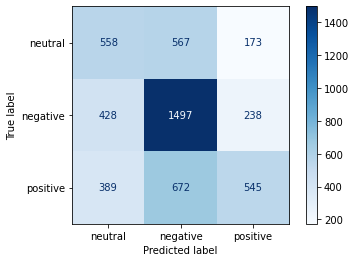

In [ ]:
cm = confusion_matrix(sentiments_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neutral','negative','positive'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

**ATTENTION: RUNTIME CHANGED FROM CPU to GPU. THIS HAPPENS ONLY FOR BERT SECTION**

## BERT:

In [ ]:
text_test=[]
sentiments_test =[]

for batch, sample in enumerate(tqdm(test_dataloader)):
  text_test.extend(sample['text'])

  sentiments_test.extend(sample['sentiment'].numpy().tolist())

100%|██████████| 80/80 [01:53<00:00,  1.41s/it]


In [ ]:
# Set the model name
MODEL_NAME = 'bert-base-uncased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME, do_lower_case=True)

In [ ]:
test_list = [text_test,sentiments_test]

df_test = pd.DataFrame(test_list).transpose()
df_test.columns = ['sentence', 'label']
df_test.head()

,sentence,label
0,With this asshole?,1
1,"Two guys walk in, one walks out.",1
2,"I'm not happy about it either, okay? At all.",1
3,"But, for now, it's done.",1
4,You're on admin leave until they make a determ...,0


In [ ]:
y_test = to_categorical(df_test.label)


In [ ]:
MAX_LEN = 40
x_test = tokenizer(
          text= df_test.sentence.tolist(),
          add_special_tokens=True,
          max_length=MAX_LEN,
          truncation=True,
          padding='max_length', 
          return_tensors='tf',
          return_token_type_ids = False,
          return_attention_mask = True,
          )

In [101]:
!gdown --id 12ma16RBDK5W6xcZGIqedt31gWbl42ZgA

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12ma16RBDK5W6xcZGIqedt31gWbl42ZgA
To: /content/model_ph2_2_2.h5
100% 1.31G/1.31G [00:05<00:00, 221MB/s]


In [102]:
bert = TFBertModel.from_pretrained(MODEL_NAME)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
def build_model(bert, max_len, is_trainable, optimizer):
    input_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

    
    outputs = bert(input_ids,attention_mask = input_mask)
    net = outputs['pooler_output']
    
    net = Dropout(0.1)(net)
    net = Dense(3, activation=None)(net)
    
    model = Model(inputs=[input_ids, input_mask], outputs=net)
    model.layers[2].trainable = is_trainable


    model.compile(optimizer=optimizer, loss =CategoricalCrossentropy(from_logits = True),metrics = CategoricalAccuracy('balanced_accuracy'))
    
    return model

In [104]:

model_ph2_2_2 = load_model('model_ph2_2_2.h5', custom_objects={"TFBertModel": transformers.TFBertModel})

model_ph2_2_2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 40)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 40)]         0           []                               
                                                                                                  
 tf_bert_model_4 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 40,                                          

In [105]:
y_logits = model_ph2_2_2.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']},verbose=1)
y_pred = np.argmax(y_logits, axis = 1)

159/159 [==============================] - 20s 99ms/step


In [107]:
print('f1_score using BERT model is ', f1_score(df_test['label'].values.tolist(), y_pred, average='weighted'))
print('accuracy_score using BERT model is ', accuracy_score(df_test['label'].values.tolist(), y_pred))
print()
print('Classification Report')
print()
print(classification_report(df_test['label'].values.tolist(), y_pred, target_names=['neutral','negative','positive']))

f1_score using BERT model is  0.6276042914419372
accuracy_score using BERT model is  0.6244326031182159

Classification Report

              precision    recall  f1-score   support

     neutral       0.49      0.57      0.53      1298
    negative       0.72      0.66      0.69      2163
    positive       0.62      0.62      0.62      1606

    accuracy                           0.62      5067
   macro avg       0.61      0.62      0.61      5067
weighted avg       0.63      0.62      0.63      5067



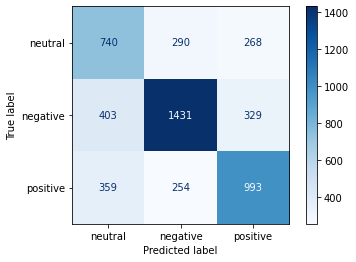

In [108]:
scm = confusion_matrix(df_test['label'].values.tolist(), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neutral','negative','positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()



*   As we can see BERT(using keras) has the best accuracy and f1 score
*   Using GloVe 50d has slightly decreased accuracy and f1 score. It may show that 50d vectors are not enough to represent our sentences well
*   Word2Vec representations using SVM had the best result among non transformer methods



------------------------------------------------------------------------------------------------------------------------------------------------------

***I tried using pytorch for training BERT model down here but the results were not acceptable***

In [110]:
class SentenceDataset(Dataset):
    # Constructor Function 
    def __init__(self, sentences, labels, tokenizer, max_len):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method
    def __len__(self):
        return len(self.sentences)
    
    # get item magic method
    def __getitem__(self, item):
        sentence = str(self.sentences[item])
        target = self.labels[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding ='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'text': sentence,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [115]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = SentenceDataset(
        sentences=df.sentence.to_numpy(),
        labels=df.label.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [116]:
# Create train, test and val data loaders
BATCH_SIZE = 16
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_valid, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [144]:
config = BertConfig.from_pretrained(MODEL_NAME)

In [145]:
bert = BertModel(config)

In [117]:
# Load the basic BERT model 
bert = BertModel.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [146]:
# Build the Sentiment Classifier class 
class BERTSentimentClassifier(nn.Module):
    
    # Constructor class 
    def __init__(self, n_classes, config):
        super(BERTSentimentClassifier, self).__init__()
        #self.bert = BertModel.from_pretrained(MODEL_NAME)
        self.bert = BertModel(config=config)
        for param in self.bert.parameters():
            param.requiresGrad = True
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    
    # Forward propagaion class
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask,
          return_dict=False
        )
        #  Add a dropout layer 
        output = self.drop(pooled_output)
        return self.out(output)

In [147]:
# Instantiate the model and move to classifier
model = BERTSentimentClassifier(3,config)
model = model.to(device)

In [141]:
# Number of iterations 
EPOCHS = 

# Optimizer Adam 
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Set the loss function 
loss_fn = nn.CrossEntropyLoss().to(device)

In [138]:
# Function for a single training iteration
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        # Backward prop
        loss.backward()
        
        # Gradient Descent
        #nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / n_examples, np.mean(losses)

def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
    return correct_predictions.double() / n_examples, np.mean(losses)

In [142]:
for epoch in range(EPOCHS):
    
    # Show details 
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)
    
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    
    print(f"Train loss {train_loss} accuracy {train_acc}")
    
    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_valid)
    )
    
    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()
    torch.cuda.empty_cache()
    


Epoch 1/3
----------
Train loss 1.099461261250756 accuracy 0.42969367588932805
Val   loss 1.1078842652708951 accuracy 0.3630258739877543

Epoch 2/3
----------
Train loss 1.0910665742022247 accuracy 0.4202075098814229
Val   loss 1.1044042672644654 accuracy 0.3630258739877543

Epoch 3/3
----------
Train loss 1.0968092450982496 accuracy 0.3999505928853755
Val   loss 1.1220208034154369 accuracy 0.3630258739877543

